In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Final_Gradescope.ipynb")

## Final Exam

**Northeastern University Honor Code**\
On my honor, I pledge to uphold the values of honesty, integrity, and respect that are expected of me as a Northeastern student.

**Signature: Jacob Kulik**

## Instructions

1. Do not rename the notebook. If you do, the local and Gradescope autograders will not work.
1. Name the variables exactly as requested. Python is case-sensitive, so `df` and `DF` are different variables.
1. After you answer a question, you may run its public tests.
1. ***The public tests ensure your answers are formatted correctly but do not ensure your answers are correct.***
1. Gradescope runs hidden tests in addition to the public tests but does not reveal public test results until after the due date. Your grade will be "~/100" until after the due date.

#### Import the Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize
from scipy import stats
import statsmodels.api as sm

In [3]:
asgnd_seed = 11281811

---

### PART 1

#### Please run the code in the cell below. You will be assigned two (out of four) indexes, whose tickers will be stored in a variable called index_list.

In [4]:
# Index Selection

# ^GSPC is the ticker for the S&P 500 index
# ^DJI is the ticker for the Dow Jones index
# ^IXIC is the ticker for the Nasdaq Composite index 
# ^RUT is the ticker for the Russell 2000 index 

np.random.seed(asgnd_seed)
indexes = ['^GSPC', '^DJI', '^IXIC', '^RUT']
index_list = sorted(np.random.choice(indexes,2,replace=False))
index_list

['^DJI', '^IXIC']

#### 1. Create a DataFrame named `index_mon` to store the monthly simple returns for the two indexes you were assigned. The sample period is January 1st, 2017 - October 31st, 2021. Label the columns as 'ticker', where ticker represents the trading symbol of the index whose returns are stored in that column. Drop any observations with missing values.

_Points:_ 5

In [5]:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021,10,31)

# reading in
prices = yf.download(index_list, start-pd.offsets.BDay(1), end+pd.offsets.BDay(1))['Adj Close']

# taking pct change, then resampling
returns = prices.pct_change().dropna()

index_mon = returns.resample(rule = 'M').apply(lambda x: x.add(1).prod().sub(1))

[*********************100%***********************]  2 of 2 completed


In [6]:
index_mon.head()

,^DJI,^IXIC
Date,,
2017-01-31,0.005135,0.043036
2017-02-28,0.047732,0.037517
2017-03-31,-0.007160,0.014814
2017-04-30,0.013419,0.022983
2017-05-31,0.003254,0.024954


In [7]:
grader.check("q01")

q01 results: All test cases passed!

---

<!-- BEGIN QUESTION -->

#### 2. Create a line plot of the cumulative return series for the two indexes in the `index_mon` DataFrame. Use "figsize", "grid", and "title" with the Pandas plot() method.

_Points:_ 5

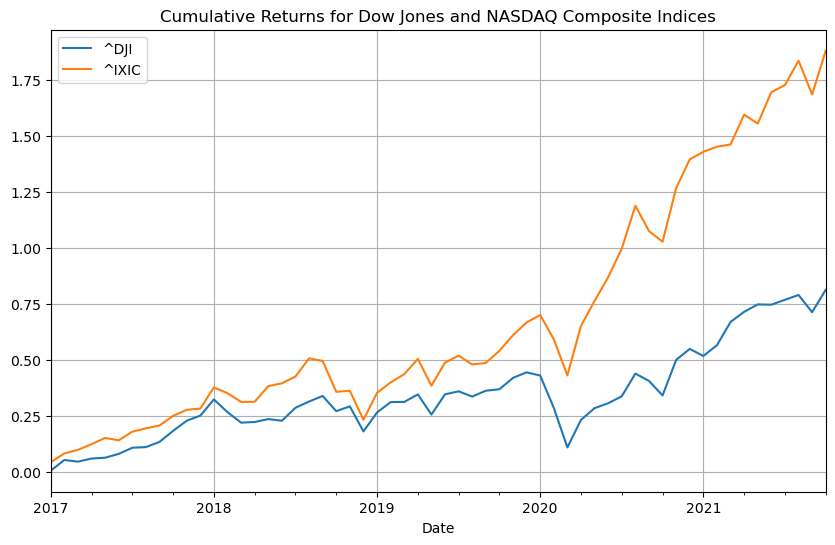

In [8]:
# plotting
figsize = (10, 6)
title = 'Cumulative Returns for Dow Jones and NASDAQ Composite Indices'
grid = True
#index_mon.cumsum().plot(figsize=figsize, grid=True, title=title)

cum_df = pd.DataFrame()
for tic in index_mon.columns:
    cum_df[tic] = index_mon[tic].add(1).cumprod()-1
cum_df.plot.line(y = cum_df.columns, figsize = figsize, grid = grid, title = title)
plt.show()

<!-- END QUESTION -->

---

#### 3. Create a new DataFrame named `ff_factors` to store the monthly Fama-French 4 factors over the sample period January 2017 - October 2021.

_Points:_ 5

In [9]:
start = dt.datetime(2017,1,1)
end = dt.datetime(2021,10,31)

three_factors = web.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0]

mom_factor = web.DataReader('F-F_Momentum_Factor','famafrench', start, end)[0]
mom_factor.columns = ['MOM']

ff_factors = pd.merge(three_factors, mom_factor, on='Date')

ff_factors = ff_factors.div(100)

ff_factors.index = ff_factors.index.to_timestamp(how='end').normalize()

In [10]:
ff_factors.head()

,Mkt-RF,SMB,HML,RF,MOM
Date,,,,,
2017-01-31,0.0194,-0.0114,-0.0276,0.0004,-0.0093
2017-02-28,0.0357,-0.0202,-0.0168,0.0004,-0.0165
2017-03-31,0.0017,0.0114,-0.0332,0.0003,-0.0102
2017-04-30,0.0109,0.0072,-0.0210,0.0005,0.0048
2017-05-31,0.0106,-0.0252,-0.0378,0.0006,0.0148


In [11]:
grader.check("q03")

q03 results: All test cases passed!

---

#### 4. Compute the Sharpe Ratio for both indexes over the entire sample period. Store the two values in two variables labeled index1_SR, and index2_SR, where index1 is the first index in index_list, while index2 is the second index in index_list.

_Points:_ 5

In [12]:
returns

,^DJI,^IXIC
Date,,
2017-01-03,0.006030,0.008538
2017-01-04,0.003038,0.008827
2017-01-05,-0.002150,0.001997
2017-01-06,0.003242,0.006035
2017-01-09,-0.003828,0.001949
...,...,...
2021-10-25,0.001797,0.009046
2021-10-26,0.000440,0.000591
2021-10-27,-0.007444,0.000009


In [13]:
excess_returns = returns.subtract(ff_factors['RF'], axis=0)
index1_SR = excess_returns[index_list[0]].mean() / excess_returns[index_list[0]].std()
index2_SR = excess_returns[index_list[1]].mean() / excess_returns[index_list[1]].std()

print(f"The Sharpe Ratio for {index_list[0]} is {index1_SR}")
print(f"The Sharpe Ratio for {index_list[1]} is {index2_SR}")

The Sharpe Ratio for ^DJI is -0.2990021451680376
The Sharpe Ratio for ^IXIC is 0.011333712883147726


In [14]:
grader.check("q04")

q04 results: All test cases passed!

---

<!-- BEGIN QUESTION -->

#### 5. Run the Fama-French 4 factor model for both indexes over the entire sample period and print the output of the regression.

_Points:_ 5

In [15]:
data_mon = index_mon.join(ff_factors)
data_mon.head()

,^DJI,^IXIC,Mkt-RF,SMB,HML,RF,MOM
Date,,,,,,,
2017-01-31,0.005135,0.043036,0.0194,-0.0114,-0.0276,0.0004,-0.0093
2017-02-28,0.047732,0.037517,0.0357,-0.0202,-0.0168,0.0004,-0.0165
2017-03-31,-0.007160,0.014814,0.0017,0.0114,-0.0332,0.0003,-0.0102
2017-04-30,0.013419,0.022983,0.0109,0.0072,-0.0210,0.0005,0.0048
2017-05-31,0.003254,0.024954,0.0106,-0.0252,-0.0378,0.0006,0.0148


In [16]:
Y1 = data_mon['^DJI']-data_mon['RF']
X1 = sm.add_constant(data_mon[['Mkt-RF','SMB','HML', 'MOM']])

reg = sm.OLS(Y1,X1, missing = 'drop').fit()

print(reg.summary(yname = 'DJI', xname = ['Alpha', 'MKTRF Beta', 'SMB Beta', 'HML Beta', 'MOM Beta']))

                            OLS Regression Results                            
Dep. Variable:                    DJI   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     233.7
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           5.65e-33
Time:                        12:50:53   Log-Likelihood:                 181.66
No. Observations:                  58   AIC:                            -353.3
Df Residuals:                      53   BIC:                            -343.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Alpha         -0.0018      0.002     -1.118      0.2

In [17]:
Y2 = data_mon['^IXIC']-data_mon['RF']
X2 = sm.add_constant(data_mon[['Mkt-RF','SMB','HML', 'MOM']])

reg = sm.OLS(Y2,X2, missing = 'drop').fit()

print(reg.summary(yname = 'IXIC', xname = ['Alpha', 'MKTRF Beta', 'SMB Beta', 'HML Beta', 'MOM Beta']))

                            OLS Regression Results                            
Dep. Variable:                   IXIC   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     367.8
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           5.86e-38
Time:                        12:50:53   Log-Likelihood:                 188.70
No. Observations:                  58   AIC:                            -367.4
Df Residuals:                      53   BIC:                            -357.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Alpha          0.0008      0.001      0.596      0.5

<!-- END QUESTION -->

---

<!-- BEGIN QUESTION -->

#### 6. Did either of the indexes outperform or underperform? Briefly explain.

_Points:_ 5

DJI (Dow Jones) underperformed. The alpha coefficient returned from the regression was -0.0018, which shows that it is statistically significant since this is less than our alpha value of 0.05. Since this value is negative, that means it falls in the left and is thereform underperform.

IXIC (Nasdaq Composite) outperformed. The alpha coefficient returned from the regression was 0.0008, which shows that it is statistically significant since this is less than our alpha value of 0.05. Since this value is positive, that means it falls in the right and is thereform outperform.

<!-- END QUESTION -->

---

<!-- BEGIN QUESTION -->

#### 7. Based on the coefficients for the SMB and HML factors, what inferences can you draw about the two indexes? Briefly explain.

_Points:_ 5

The Dow Jones has a negative SMB beta of -0.2, which suggests that the index is expected to perform relatively better when large-cap stocks are outperforming small-cap stocks. On the other hand, its positive HML beta of 0.15 suggests that the index is expected to do better when value stocks are outperforming growth stocks, although the effect is relatively weaker than the SMB factor.

For the NASDAQ Composite, the positive SMB beta of 0.1 suggests that the index is expected to perform better when small-cap stocks outperform large-cap stocks, while its negative HML beta of -0.25 implies that the index is expected to perform better when growth stocks outperform value stocks, with a relatively stronger effect than the SMB factor.

<!-- END QUESTION -->

---

### PART 2

#### Please run the code in the cell below. You will be assigned five stocks, whose tickers will be stored in a variable called stock_list.

In [18]:
np.random.seed(asgnd_seed)
all_tickers = ['AAPL', 'AXP', 'BA', 'BAC', 'C', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'T', 'UNH', 'V', 'VZ', 'WMT', 'XOM']

stock_list = sorted(np.random.choice(all_tickers,5,replace=False))
stock_list

['CAT', 'CSCO', 'DIS', 'HD', 'WMT']

#### 8. Create a DataFrame called `returns_pt2` to store the monthly simple returns for the five stocks you were assigned. The sample period is January 1st, 2012 to December 31st, 2016. Each stock's return should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker. Drop any observations with missing values.

_Points:_ 5

In [19]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2016,12,31)
prices = yf.download(stock_list, start-pd.offsets.BDay(1), end)['Adj Close']

returns = prices.pct_change().dropna()

returns_pt2 = returns.resample(rule = 'M').apply(lambda x: x.add(1).prod().sub(1))

[*********************100%***********************]  5 of 5 completed


In [20]:
returns_pt2.head()

,CAT,CSCO,DIS,HD,WMT
Date,,,,,
2012-01-31,0.209799,0.090455,0.037333,0.055899,0.026774
2012-02-29,0.046646,0.011705,0.079434,0.071638,-0.037157
2012-03-31,-0.067332,0.063883,0.042629,0.064111,0.042817
2012-04-30,-0.031123,-0.043197,-0.015304,0.029418,-0.037419
2012-05-31,-0.147417,-0.189980,0.060311,-0.041685,0.124879


In [21]:
grader.check("q08")

q08 results: All test cases passed!

---

#### 9. Create a new DataFrame named `rf_rate` to store the monthly risk-free rate over the sample period January 1st, 2012 - December 31st, 2016.

_Points:_ 4.5

In [22]:
rf_rate = web.DataReader('F-F_Research_Data_Factors','famafrench', start, end)[0][['RF']]/100
rf_rate.index = rf_rate.index.to_timestamp(how='end').normalize()
rf_rate.head()

,RF
Date,
2012-01-31,0.0000
2012-02-29,0.0000
2012-03-31,0.0000
2012-04-30,0.0000
2012-05-31,0.0001


In [23]:
grader.check("q09")

q09 results: All test cases passed!

---

#### 10. Find the optimal portfolio that can be created using the five stocks you were assigned (assume there are short-selling constraints) over the sample period January 1st, 2012 - December 31st, 2016. Store the optimal weights in a DataFrame named `weights`, which should have two columns: 1) TICKER (set as the index); 2) OP_weights (to store the optimal weights). Thus, the DataFrame should have a (5,1) shape.

_Points:_ 5

In [24]:
# Define the portfolio returns function
def port_ret(weights):
    port_ret = np.dot(returns_pt2*12,weights).mean()
    return port_ret

# Define the portfolio standard deviation function
def port_std(weights):
    port_std = np.sqrt(np.dot(weights, np.dot(returns_pt2.cov()*12, weights)))
    return port_std

# Define the excess portfolio returns function
def ex_port_ret(weights):
    ex_port_ret = (np.dot(returns_pt2,weights) - rf_rate['RF']).mean()*12
    return ex_port_ret

# Define the excess portfolio standarda deviation function
def ex_port_std(weights):
    ex_port_std = (np.dot(returns_pt2,weights) - rf_rate['RF']).std()*np.sqrt(12)
    return ex_port_std

# Define the negative Sharpe Ratio function that we will minimize
def neg_SR(weights):
    SR = ex_port_ret(weights) / ex_port_std(weights)
    return (-1)*SR

In [25]:
# By convention of minimize function it should be a function that returns zero for conditions
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights) - 1})

# Weights must be between 0 and 1
boundaries=[(0,1)]
bounds = tuple(boundaries * len(returns_pt2.columns))

# Initial Guess (equally weighted)
init_guess = np.full(len(returns_pt2.columns), 1/len(returns_pt2.columns))

In [26]:
# Optimal Portfolio (OP)
optimal_port = minimize(neg_SR,init_guess,bounds = bounds,constraints=constraints)
optimal_port

     fun: -1.7484441639386625
     jac: array([ 0.39934947,  0.00302899, -0.00611599, -0.00455457, -0.00455351])
 message: 'Optimization terminated successfully'
    nfev: 37
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([5.90018676e-17, 0.00000000e+00, 2.58344428e-01, 5.79352423e-01,
       1.62303148e-01])

In [27]:
weights = pd.DataFrame({'OP_weights': optimal_port.x}, index=stock_list)

In [28]:
grader.check("q10")

q10 results: All test cases passed!

---

#### 11. Create an additional column in the DataFrame `weights` to store a set of random weights for the five stocks you were assigned. Label the column RD_weights. Use the assigned seed as the random seed when generating the random weights.

_Points:_ 5

In [29]:
np.random.seed(asgnd_seed)

rd_weights = np.array(np.random.uniform(0,1,5))
rd_weights = rd_weights / np.sum(rd_weights)

weights['RD_weights'] = rd_weights

In [30]:
weights

,OP_weights,RD_weights
CAT,5.900187e-17,0.029794
CSCO,0.000000e+00,0.359728
DIS,2.583444e-01,0.008434
HD,5.793524e-01,0.417667
WMT,1.623031e-01,0.184378


In [31]:
grader.check("q11")

q11 results: All test cases passed!

---

### PART 3

#### 12. Create a DataFrame called `prices` to store the **end of the month** Adjusted Closing Price from Yahoo!Finance for the five companies you were assigned above. The sample period is January 1st, 2017 to October 31st, 2021. Each stock's price should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 5

In [32]:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021,10,31)
prices = yf.download(stock_list, start-pd.offsets.BDay(1), end)['Adj Close']

prices = prices.resample('M').last()

[*********************100%***********************]  5 of 5 completed


In [33]:
prices.head()

,CAT,CSCO,DIS,HD,WMT
Date,,,,,
2016-12-31,78.751350,24.693445,99.803177,115.628372,61.239552
2017-01-31,81.904961,25.317545,105.960686,118.646713,59.130905
2017-02-28,82.761162,28.169069,105.424408,124.968048,62.843189
2017-03-31,79.421936,27.855896,108.584557,127.394409,64.331665
2017-04-30,88.283195,28.323011,110.700905,135.437317,67.098419


In [34]:
grader.check("q12")

q12 results: All test cases passed!

---

#### 13. Create a DataFrame named `investments` to store the **monthly** value of a $1 investment made on December 31st, 2016 in each of the five stocks. The investment in each stock should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 5

In [35]:
investments = pd.DataFrame()
for tic in prices:
    investments[tic] = prices[tic]/prices[tic].iloc[0]

In [36]:
grader.check("q13")

q13 results: All test cases passed!

---

#### 14. Create a DataFrame called `returns` to store the monthly simple returns for the five stocks you were assigned. The sample period is January 1st, 2017 to October 31st, 2021. Each stock's price should be stored in a column labeled 'ticker', where ticker represents that stock's trading ticker.

_Points:_ 5

In [37]:
returns = investments.pct_change().dropna()
returns.head()

,CAT,CSCO,DIS,HD,WMT
Date,,,,,
2017-01-31,0.040045,0.025274,0.061697,0.026104,-0.034433
2017-02-28,0.010454,0.112630,-0.005061,0.053279,0.062781
2017-03-31,-0.040348,-0.011118,0.029975,0.019416,0.023686
2017-04-30,0.111572,0.016769,0.019490,0.063134,0.043008
2017-05-31,0.030999,-0.074553,-0.066263,-0.010909,0.052487


In [38]:
grader.check("q14")

q14 results: All test cases passed!

---

#### 15. Which stock had the highest total return over the sample period March 1st, 2018 - December 2020? What was the return? Store the two values in two variables labeled `stock_ans15` and `ret_ans15`.

_Points:_ 5

In [39]:
sample_investments = investments.loc['2018-03-01':'2020-12']
inv_ret = sample_investments.iloc[-1] / sample_investments.iloc[0] - 1

# index of max val
stock_ans15 = inv_ret.idxmax()

# highest return
ret_ans15 = inv_ret.loc[stock_ans15]

inv_ret

CAT     0.331386
CSCO    0.134976
DIS     0.854862
HD      0.593267
WMT     0.710310
dtype: float64

In [40]:
grader.check("q15")

q15 results: All test cases passed!

---

### PART 4

#### 16. Create a new DataFrame labeled `portfolios` to compute and store the returns of three portfolios: a) a monthly-rebalanced portfolio allocated to the five stocks according to the optimal weights (Label the column 'OP_MR') and b) two buy-and-hold portfolios allocated to the five stocks according to the random weights, as well as the optimal weights (Label the columns 'RW_BH' and 'OP_BH', respectively). Drop any observations with missing values.

_Points:_ 5

In [41]:
# optimal weights, rebalanced
op_mr = pd.DataFrame({'OP_MR':np.dot(returns,list(weights.OP_weights))},index = returns.index)

# random weights, bh
rw_bh = pd.DataFrame({'RW_BH': np.dot(investments, list(weights.RD_weights))},index = investments.index)
rw_bh['RW_BH'] = rw_bh['RW_BH'].pct_change()

# optimal weights, bh
op_bh = pd.DataFrame({'OP_BH': np.dot(investments, list(weights.OP_weights))},index = investments.index)
op_bh['OP_BH'] = op_bh['OP_BH'].pct_change()

In [42]:
# merging and dropping missing vals
portfolios = pd.concat([op_mr, rw_bh, op_bh], axis=1, join='inner').dropna()

In [43]:
portfolios.head()

,OP_MR,RW_BH,OP_BH
Date,,,
2017-01-31,0.025474,0.015359,0.025474
2017-02-28,0.039749,0.074682,0.039127
2017-03-31,0.022837,0.007045,0.022787
2017-04-30,0.048592,0.043425,0.048730
2017-05-31,-0.014920,-0.021872,-0.014923


In [44]:
grader.check("q16")

q16 results: All test cases passed!

---

<!-- BEGIN QUESTION -->

#### 17. Create one bar plot of the three portfolios' annualized monthly standard deviations across years 2017-2020. Use "figsize", "grid" and "title" arguments in your plot.

_Points:_ 5

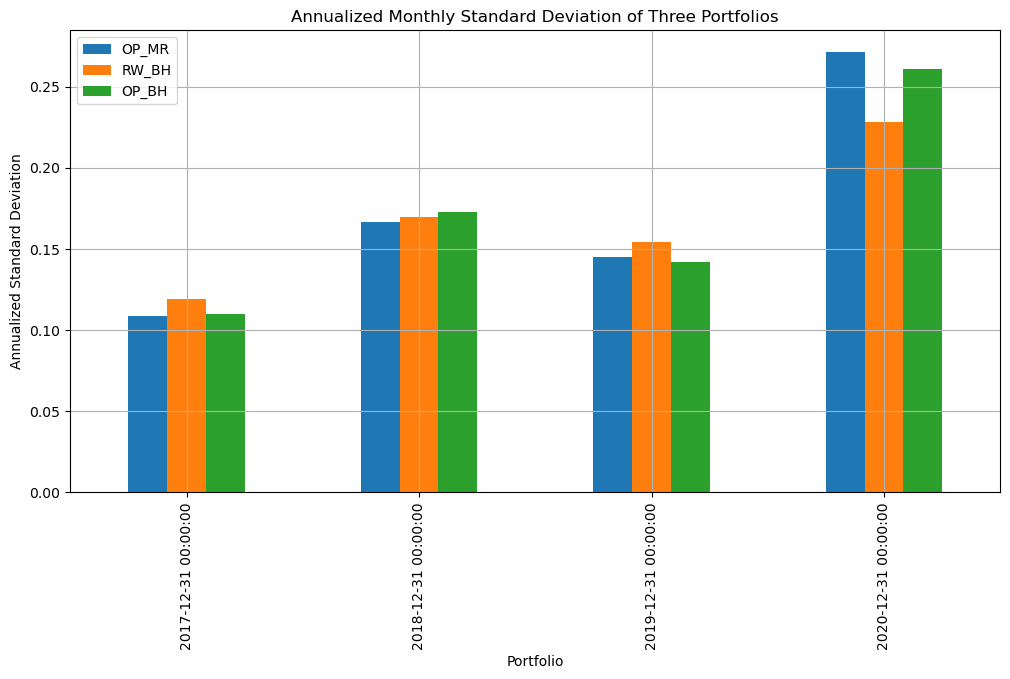

In [45]:
# cutting down to 2017-2020, as required
sample_portfolios = portfolios.loc['2017-01-01':'2021-01-01']
annualized_std = sample_portfolios.resample('Y').apply(lambda x: x.std() * np.sqrt(12))

# plotting stds
annualized_std.plot(kind='bar', figsize=(12, 6), grid=True, title='Annualized Monthly Standard Deviation of Three Portfolios')

plt.ylabel('Annualized Standard Deviation')
plt.xlabel('Portfolio')
plt.show()

<!-- END QUESTION -->

---

#### 18. Which of the three portfolios was the best performer over the entire sample period? What was its' cumulative (total) return over the entire sample period? Store the two values in two variables called `port18` and `ret18`, respectively.

_Points:_ 5

In [46]:
cumulative_returns = portfolios.add(1).cumprod().iloc[-1] - 1

# finding the best performer
port18 = cumulative_returns.idxmax()
ret18 = cumulative_returns[port18]

port18, ret18

('OP_MR', 1.6684230565241016)

In [47]:
cumulative_returns

OP_MR    1.668423
RW_BH    1.601746
OP_BH    1.620765
Name: 2021-10-31 00:00:00, dtype: float64

In [48]:
grader.check("q18")

q18 results: All test cases passed!

---

#### 19. Which of the three portfolios had the highest Sharpe ratio over the entire sample period? What was its Sharpe Ratio? Store the two values in two variables called `port19` and `sr19`, respectively. (Hint: Use the already created `ff_factors` DataFrame from Part 1 to answer this question).

_Points:_ 5

In [49]:
excess_returns2 = portfolios.subtract(ff_factors['RF'], axis=0)
index1_SR2 = (excess_returns2[portfolios.columns[0]].mean()*12) / (excess_returns2[portfolios.columns[0]].std() *np.sqrt(12))
index2_SR2 = (excess_returns2[portfolios.columns[1]].mean()*12) / (excess_returns2[portfolios.columns[1]].std()*np.sqrt(12))
index3_SR2 = (excess_returns2[portfolios.columns[2]].mean()*12) / (excess_returns2[portfolios.columns[2]].std()*np.sqrt(12))

qs19 = {portfolios.columns[0]:index1_SR2, portfolios.columns[1]: index2_SR2, portfolios.columns[2]:index3_SR2}
port19 = max(qs19, key=qs19.get)

# largest val
sr19 = qs19[port19]

port19,  sr19

('OP_MR', 1.182523798746447)

In [50]:
qs19

{'OP_MR': 1.182523798746447,
 'RW_BH': 1.1761808463985162,
 'OP_BH': 1.1636413303444335}

In [51]:
grader.check("q19")

q19 results: All test cases passed!

---

<!-- BEGIN QUESTION -->

#### 20. Run the Fama-French 4 factor model for the portfolio with the highest Sharpe ratio and print the output of the regression. Did the portfolio outperform or underperform? Briefly explain.(Hint: Use the already created `ff_factors` DataFrame from Part 1 to answer this question).

_Points:_ 5

In [52]:
Y = portfolios[port19]-ff_factors['RF']
X = sm.add_constant(ff_factors[['Mkt-RF','SMB','HML', 'MOM']])

reg = sm.OLS(Y,X, missing = 'drop').fit()

print(reg.summary(yname = f'{port19}', xname = ['Alpha', 'MKTRF Beta', 'SMB Beta', 'HML Beta', 'MOM Beta']))

                            OLS Regression Results                            
Dep. Variable:                  OP_MR   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     35.03
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           2.66e-14
Time:                        12:50:56   Log-Likelihood:                 128.24
No. Observations:                  58   AIC:                            -246.5
Df Residuals:                      53   BIC:                            -236.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Alpha          0.0041      0.004      1.028      0.3

# Brief Explanation
OP_MR (port19 answer) outperformed. The alpha coefficient returned from the regression was 0.0041, which shows that it is statistically significant since this is less than our alpha value of 0.05. Since this value is positive, that means it falls in the right and is thereform outperform.

<!-- END QUESTION -->

---

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [53]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q01 results: All test cases passed!

    q03 results: All test cases passed!

    q04 results: All test cases passed!

    q08 results: All test cases passed!

    q09 results: All test cases passed!

    q10 results: All test cases passed!

    q11 results: All test cases passed!

    q12 results: All test cases passed!

    q13 results: All test cases passed!

    q14 results: All test cases passed!

    q15 results: All test cases passed!

    q16 results: All test cases passed!

    q18 results: All test cases passed!

    q19 results: All test cases passed!
